In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

stars = pd.read_csv('data/stars.csv').drop(columns=['name', 'spectraltype']).dropna()
stars.head()

,magJ,radius,magB,magV,temperature,magK,mass,metallicity,magH,planets
0,2.943,19.000,5.740,4.740,4742.0,2.282,2.70,-0.350,2.484,1.0
1,2.876,24.080,6.415,5.024,4340.0,1.939,1.80,0.040,2.091,1.0
2,3.019,11.000,6.240,5.220,4813.0,2.331,2.20,-0.240,2.608,1.0
3,5.158,0.708,7.570,6.670,5311.0,4.714,1.00,0.430,4.803,2.0
4,5.090,1.243,6.590,5.950,5825.0,4.430,1.11,0.096,4.720,0.0


In [13]:
stars.shape

(576, 10)

In [14]:
y = stars.pop('temperature')
x = stars
x.head()

,magJ,radius,magB,magV,magK,mass,metallicity,magH,planets
0,2.943,19.000,5.740,4.740,2.282,2.70,-0.350,2.484,1.0
1,2.876,24.080,6.415,5.024,1.939,1.80,0.040,2.091,1.0
2,3.019,11.000,6.240,5.220,2.331,2.20,-0.240,2.608,1.0
3,5.158,0.708,7.570,6.670,4.714,1.00,0.430,4.803,2.0
4,5.090,1.243,6.590,5.950,4.430,1.11,0.096,4.720,0.0


In [15]:
y.head()

0    4742.0
1    4340.0
2    4813.0
3    5311.0
4    5825.0
Name: temperature, dtype: float64

In [16]:
x.isnull().sum()

magJ           0
radius         0
magB           0
magV           0
magK           0
mass           0
metallicity    0
magH           0
planets        0
dtype: int64

In [17]:
x.info(), x.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 0 to 2970
Data columns (total 9 columns):
magJ           576 non-null float64
radius         576 non-null float64
magB           576 non-null float64
magV           576 non-null float64
magK           576 non-null float64
mass           576 non-null float64
metallicity    576 non-null float64
magH           576 non-null float64
planets        576 non-null float64
dtypes: float64(9)
memory usage: 45.0 KB


(None, (576, 9))

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [20]:
%%capture 
# don't show warning messages or output for this cell
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [23]:
pipeline = Pipeline([
    ('scale', MinMaxScaler()),
    ('net', ElasticNet(random_state=0))
])

In [24]:
ElasticNet?

In [26]:
%%capture 
search_space = {
    'net__alpha' : [0.1, 0.5, 1, 1.5, 2, 5],
    'net__l1_ratio' : np.linspace(0, 1, num=10),
    'net__fit_intercept' : [True, False]
}

net_grid = GridSearchCV(pipeline, search_space, cv=5).fit(x_train, y_train)

In [27]:
net_grid.best_params_

{'net__alpha': 0.1, 'net__fit_intercept': True, 'net__l1_ratio': 1.0}

In [28]:
net_grid.score(x_test, y_test)

0.9087828533751551

In [31]:
net_grid.best_estimator_.named_steps['net'].intercept_

5247.4935043765545

In [32]:
net_grid.best_estimator_.named_steps['net'].coef_

array([-9.56582893e+03, -5.16077878e+00, -6.23698868e+03, -4.29352587e+03,
        1.98511665e+04,  7.56112904e+02,  2.23721385e+00, -0.00000000e+00,
       -2.54552819e+02])

In [33]:
[(col, coef) for col, coef in zip(x_test.columns,net_grid.best_estimator_.named_steps['net'].coef_ )]

[('magJ', -9565.82893404894),
 ('radius', -5.160778783635048),
 ('magB', -6236.988678823794),
 ('magV', -4293.525874880935),
 ('magK', 19851.16654114147),
 ('mass', 756.1129040290806),
 ('metallicity', 2.23721384997471),
 ('magH', -0.0),
 ('planets', -254.55281943900587)]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0E379470>,
      dtype=object)

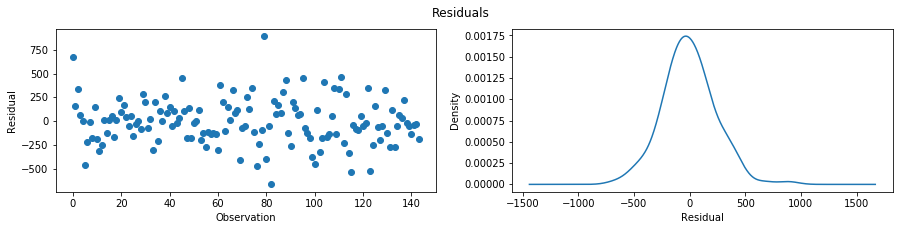

In [36]:
from ml_utils.regression import plot_residuals

plot_residuals(y_test, net_grid.predict(x_test))